In [154]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [155]:
df=pd.read_csv('https://raw.githubusercontent.com/nsethi4310/CoffeeMLProject3/main/Resources/retail-prices.csv')

In [156]:
df.rename(columns={ df.columns[0]: "Country"},inplace=True)
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620
5,Germany,8.807947,8.476821,8.830022,7.991170,9.227373,11.081678,9.205298,8.896247,8.918322,...,10.485651,10.507726,11.258278,10.463576,12.472406,12.626932,11.434879,11.147903,11.788079,12.119205
6,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.953642,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945
7,Netherlands,6.688742,6.512141,6.909492,6.181015,7.196468,8.896247,8.057395,8.101545,8.101545,...,10.375276,10.088300,13.200883,12.869757,12.671082,12.604857,11.876380,10.529801,10.662252,10.331126
8,Portugal,9.094923,9.426049,10.927152,9.426049,9.668874,13.774834,13.068433,11.125828,10.772627,...,11.699779,10.883002,11.810155,12.560706,12.781457,12.649007,11.015453,10.883002,11.125828,11.832230
9,Spain,7.991170,7.726269,7.726269,6.158940,6.092715,9.823400,9.227373,7.880795,7.991170,...,9.183223,8.653422,9.757174,9.867550,10.000000,9.801325,8.432671,8.233996,8.476821,9.050773


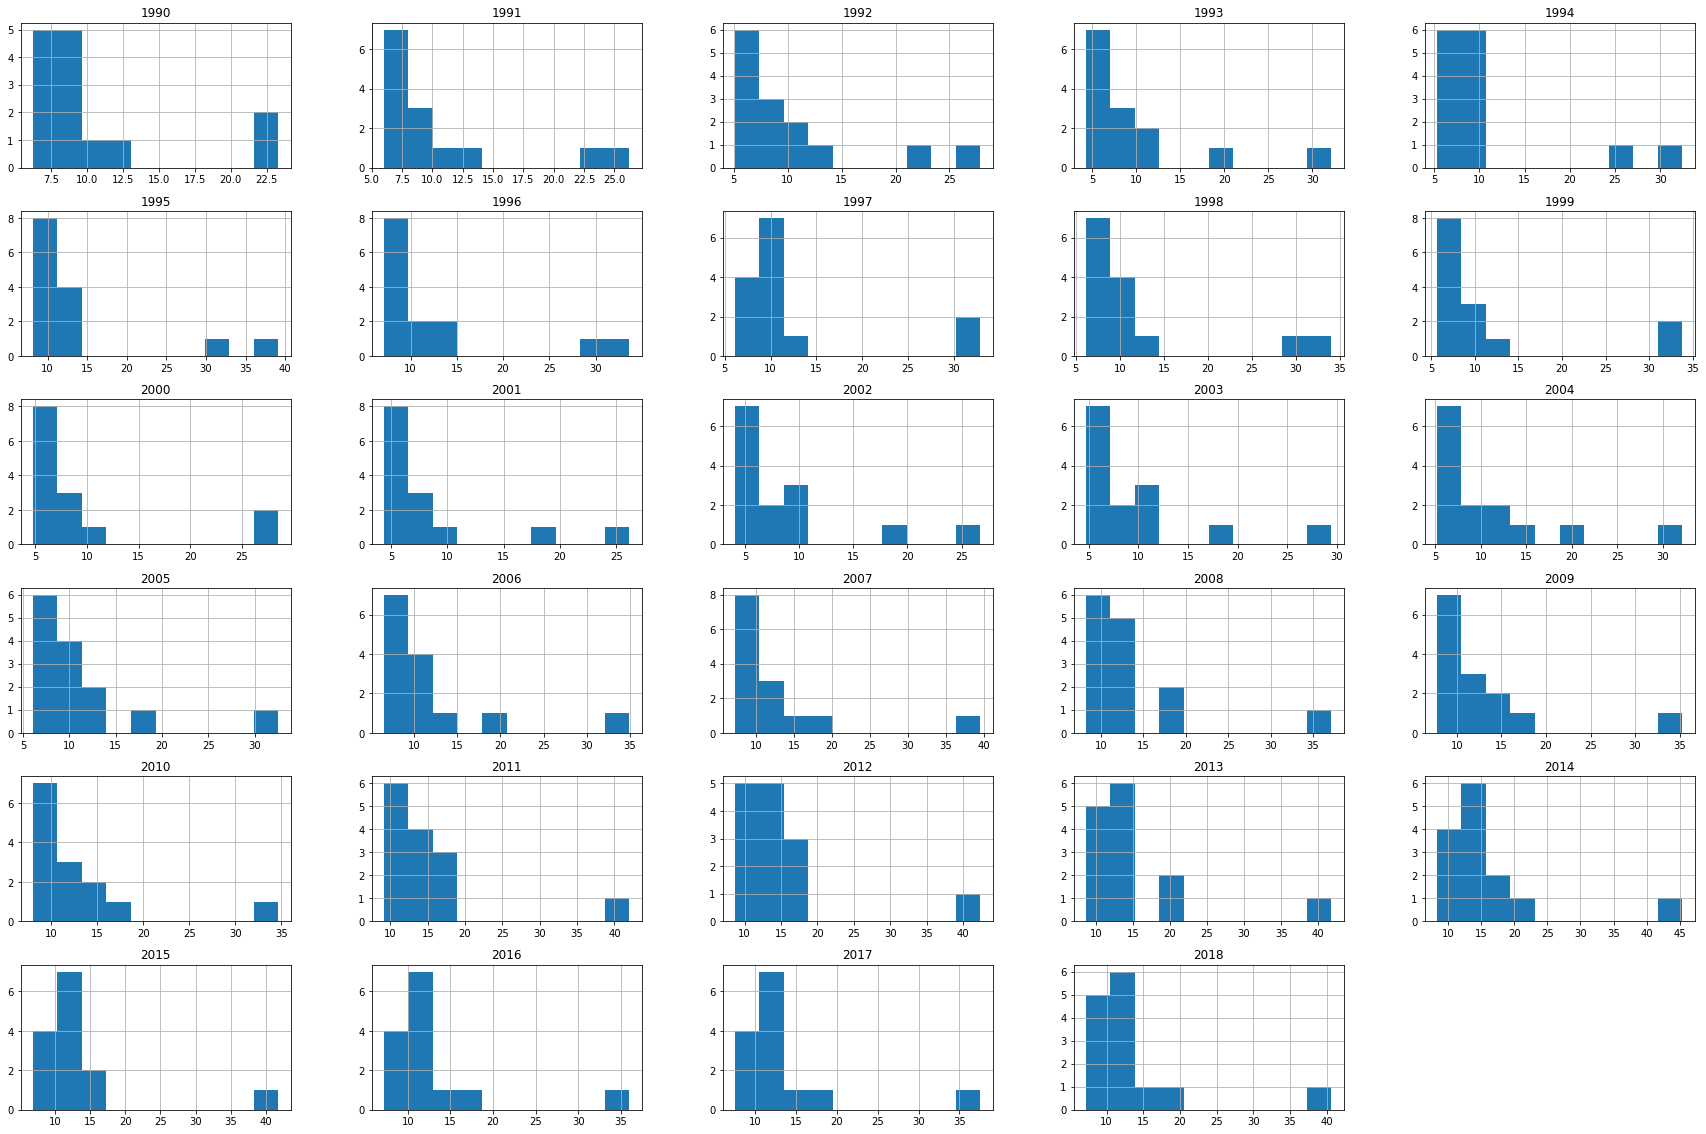

In [157]:
df.hist(figsize=(30,20));

In [158]:
df.shape

(14, 30)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  14 non-null     object 
 1   1990     14 non-null     float64
 2   1991     14 non-null     float64
 3   1992     14 non-null     float64
 4   1993     14 non-null     float64
 5   1994     14 non-null     float64
 6   1995     14 non-null     float64
 7   1996     14 non-null     float64
 8   1997     14 non-null     float64
 9   1998     14 non-null     float64
 10  1999     14 non-null     float64
 11  2000     14 non-null     float64
 12  2001     14 non-null     float64
 13  2002     14 non-null     float64
 14  2003     14 non-null     float64
 15  2004     14 non-null     float64
 16  2005     14 non-null     float64
 17  2006     14 non-null     float64
 18  2007     14 non-null     float64
 19  2008     14 non-null     float64
 20  2009     14 non-null     float64
 21  2010     14 non-nu

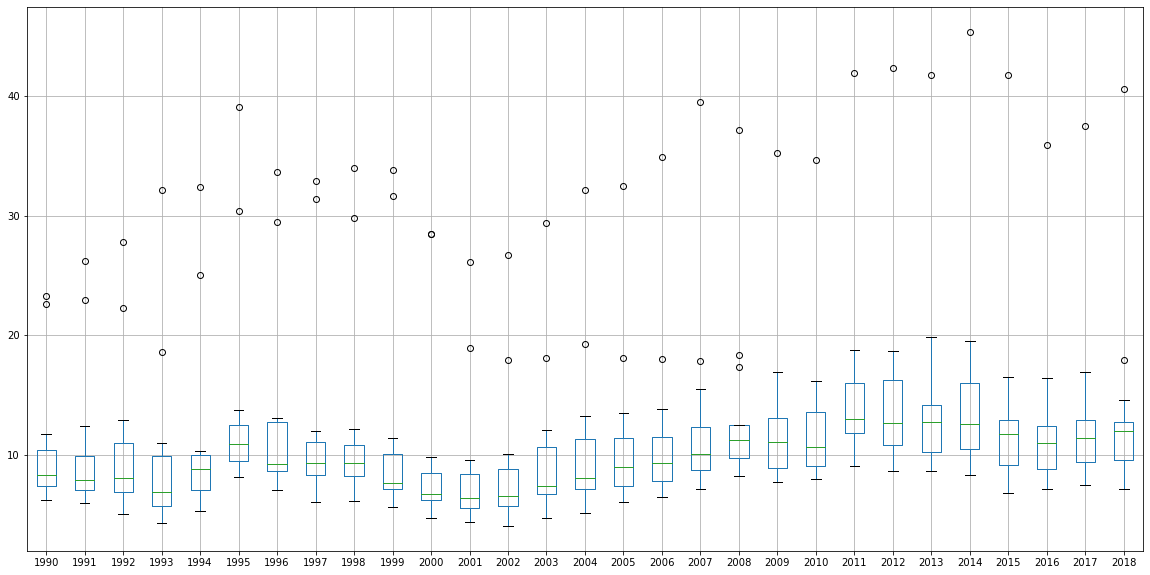

In [160]:
box_x = df[['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018']]
box_x.boxplot(figsize=(20,10))

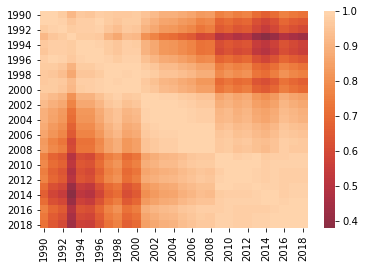

In [161]:
sns.heatmap(df.corr(), center = 0)

In [162]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,10.386313,10.424156,10.532955,9.651529,10.994954,14.035005,12.798802,12.451908,12.407758,11.483759,...,12.817723,12.729423,15.435194,15.271208,14.935352,15.439924,13.653422,12.658467,13.107852,13.651845
std,5.546777,6.273829,6.637369,7.459907,7.831975,9.090178,8.211118,8.484324,8.458505,9.153303,...,7.030654,6.792755,8.168584,8.398195,8.398773,9.285872,8.560703,7.165679,7.473492,8.235462
min,6.247241,6.004415,5.099338,4.282561,5.298013,8.145695,7.108168,6.092715,6.136865,5.629139,...,7.748344,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,7.152318
25%,7.373068,7.047461,6.870861,5.767108,7.064018,9.508830,8.642384,8.300221,8.228477,7.157837,...,8.951435,9.078366,11.815673,10.816777,10.286976,10.485651,9.210817,8.807947,9.453642,9.602649
50%,8.322296,7.913907,8.046358,6.931567,8.796909,10.894040,9.216336,9.337748,9.326711,7.649007,...,11.081678,10.695364,12.980132,12.715232,12.726269,12.637969,11.788079,11.026490,11.456954,11.975717
75%,10.386313,9.922737,10.993377,9.955850,10.038631,12.511038,12.792494,11.081678,10.838852,10.121413,...,13.101545,13.581678,15.987859,16.241722,14.221854,15.993377,12.891832,12.406181,12.958057,12.798013
max,23.289183,26.225166,27.858720,32.163355,32.428256,39.116998,33.642384,32.891832,34.039735,33.818985,...,35.298013,34.657837,41.986755,42.384106,41.766004,45.386313,41.743929,35.960265,37.549669,40.618102


In [163]:
df.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')

In [164]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']]
y = df["2018"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(14, 28) (14, 1)


In [165]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [166]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
scaler=StandardScaler()
### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [167]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [168]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

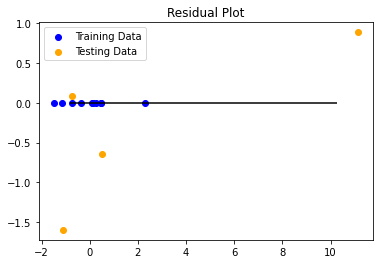

In [169]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictionslen = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [170]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictionslen)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9402941958374152, R2: 0.951115984010826


In [171]:
predictionslen
predictionlen1=model.predict(X_train)
y_train
pd1=predictionlen1.astype(int)
y_train, pd1

(array([[12.1192053 ],
        [11.83222958],
        [11.69977925],
        [12.78145695],
        [12.69315673],
        [ 8.12362031],
        [10.33112583],
        [ 7.15231788],
        [ 9.3598234 ],
        [17.92494481]]),
 array([[13],
        [13],
        [13],
        [14],
        [14],
        [ 9],
        [12],
        [ 9],
        [10],
        [19]]))

In [172]:
X_train2018= df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']]
predictionlen2=model.predict(X_train2020).astype(int)

In [173]:
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620
5,Germany,8.807947,8.476821,8.830022,7.991170,9.227373,11.081678,9.205298,8.896247,8.918322,...,10.485651,10.507726,11.258278,10.463576,12.472406,12.626932,11.434879,11.147903,11.788079,12.119205
6,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.953642,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945
7,Netherlands,6.688742,6.512141,6.909492,6.181015,7.196468,8.896247,8.057395,8.101545,8.101545,...,10.375276,10.088300,13.200883,12.869757,12.671082,12.604857,11.876380,10.529801,10.662252,10.331126
8,Portugal,9.094923,9.426049,10.927152,9.426049,9.668874,13.774834,13.068433,11.125828,10.772627,...,11.699779,10.883002,11.810155,12.560706,12.781457,12.649007,11.015453,10.883002,11.125828,11.832230
9,Spain,7.991170,7.726269,7.726269,6.158940,6.092715,9.823400,9.227373,7.880795,7.991170,...,9.183223,8.653422,9.757174,9.867550,10.000000,9.801325,8.432671,8.233996,8.476821,9.050773


In [174]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,10.386313,10.424156,10.532955,9.651529,10.994954,14.035005,12.798802,12.451908,12.407758,11.483759,...,12.817723,12.729423,15.435194,15.271208,14.935352,15.439924,13.653422,12.658467,13.107852,13.651845
std,5.546777,6.273829,6.637369,7.459907,7.831975,9.090178,8.211118,8.484324,8.458505,9.153303,...,7.030654,6.792755,8.168584,8.398195,8.398773,9.285872,8.560703,7.165679,7.473492,8.235462
min,6.247241,6.004415,5.099338,4.282561,5.298013,8.145695,7.108168,6.092715,6.136865,5.629139,...,7.748344,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,7.152318
25%,7.373068,7.047461,6.870861,5.767108,7.064018,9.508830,8.642384,8.300221,8.228477,7.157837,...,8.951435,9.078366,11.815673,10.816777,10.286976,10.485651,9.210817,8.807947,9.453642,9.602649
50%,8.322296,7.913907,8.046358,6.931567,8.796909,10.894040,9.216336,9.337748,9.326711,7.649007,...,11.081678,10.695364,12.980132,12.715232,12.726269,12.637969,11.788079,11.026490,11.456954,11.975717
75%,10.386313,9.922737,10.993377,9.955850,10.038631,12.511038,12.792494,11.081678,10.838852,10.121413,...,13.101545,13.581678,15.987859,16.241722,14.221854,15.993377,12.891832,12.406181,12.958057,12.798013
max,23.289183,26.225166,27.858720,32.163355,32.428256,39.116998,33.642384,32.891832,34.039735,33.818985,...,35.298013,34.657837,41.986755,42.384106,41.766004,45.386313,41.743929,35.960265,37.549669,40.618102


In [175]:
df["2021"]=predictionlen2
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2021
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762,14
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457,14
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779,13
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823,10
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620,9
5,Germany,8.807947,8.476821,8.830022,7.991170,9.227373,11.081678,9.205298,8.896247,8.918322,...,10.507726,11.258278,10.463576,12.472406,12.626932,11.434879,11.147903,11.788079,12.119205,13
6,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945,19
7,Netherlands,6.688742,6.512141,6.909492,6.181015,7.196468,8.896247,8.057395,8.101545,8.101545,...,10.088300,13.200883,12.869757,12.671082,12.604857,11.876380,10.529801,10.662252,10.331126,12
8,Portugal,9.094923,9.426049,10.927152,9.426049,9.668874,13.774834,13.068433,11.125828,10.772627,...,10.883002,11.810155,12.560706,12.781457,12.649007,11.015453,10.883002,11.125828,11.832230,13
9,Spain,7.991170,7.726269,7.726269,6.158940,6.092715,9.823400,9.227373,7.880795,7.991170,...,8.653422,9.757174,9.867550,10.000000,9.801325,8.432671,8.233996,8.476821,9.050773,10


In [176]:
df.set_index('Country')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2021
Country,,,,,,,,,,,,,,,,,,,,,
Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,7.240618,...,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762,14
Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,9.690949,...,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457,14
Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,8.675497,...,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779,13
Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,5.739514,...,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823,10
France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,5.629139,...,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620,9
Germany,8.807947,8.476821,8.830022,7.991170,9.227373,11.081678,9.205298,8.896247,8.918322,7.549669,...,10.507726,11.258278,10.463576,12.472406,12.626932,11.434879,11.147903,11.788079,12.119205,13
Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,11.390728,...,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945,19
Netherlands,6.688742,6.512141,6.909492,6.181015,7.196468,8.896247,8.057395,8.101545,8.101545,6.865342,...,10.088300,13.200883,12.869757,12.671082,12.604857,11.876380,10.529801,10.662252,10.331126,12
Portugal,9.094923,9.426049,10.927152,9.426049,9.668874,13.774834,13.068433,11.125828,10.772627,10.264901,...,10.883002,11.810155,12.560706,12.781457,12.649007,11.015453,10.883002,11.125828,11.832230,13


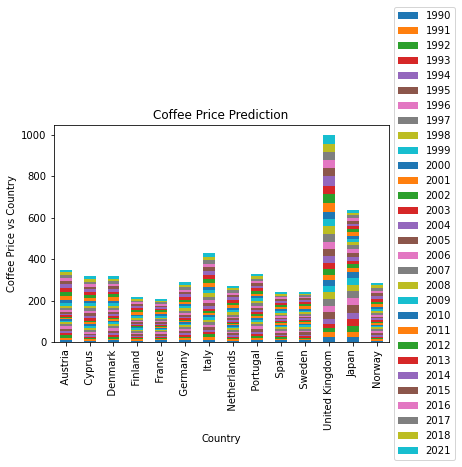

In [177]:
df.plot(kind='bar', stacked =True, x='Country')
plt.title("Coffee Price Prediction")
plt.xlabel("Country")
plt.ylabel("Coffee Price vs Country")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [178]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.07263237964166169, R2: 0.9962239877439926


In [179]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8819605641283141, R2: 0.9541486329389997


In [180]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

# elasticnet_df["MSE"]

MSE: 0.13444090646480011, R2: 0.9930106859636931
